In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
nx = 572
ny = 572

In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [5]:
x_test, y_test = generator(1)

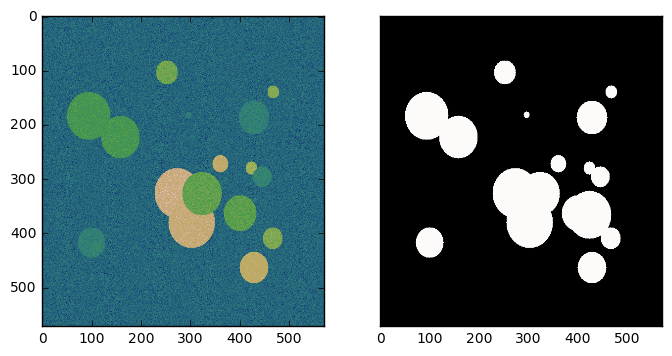

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2017-07-18 19:03:04,847 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [8]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [9]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)

2017-07-18 19:03:06,249 Removing '/mnt/unet/tf_unet/prediction'
2017-07-18 19:03:06,252 Removing '/mnt/unet/tf_unet/unet_trained'
2017-07-18 19:03:06,270 Allocating '/mnt/unet/tf_unet/prediction'
2017-07-18 19:03:06,271 Allocating '/mnt/unet/tf_unet/unet_trained'
2017-07-18 19:03:11,227 Verification error= 50.7%, loss= 0.6905
2017-07-18 19:03:11,894 Start optimization
2017-07-18 19:03:13,931 Iter 0, Minibatch Loss= 0.6268, Training Accuracy= 0.8454, Minibatch error= 15.5%
2017-07-18 19:03:14,870 Iter 2, Minibatch Loss= 0.5421, Training Accuracy= 0.8920, Minibatch error= 10.8%
2017-07-18 19:03:15,785 Iter 4, Minibatch Loss= 0.5383, Training Accuracy= 0.8089, Minibatch error= 19.1%
2017-07-18 19:03:16,741 Iter 6, Minibatch Loss= 0.5128, Training Accuracy= 0.8071, Minibatch error= 19.3%
2017-07-18 19:03:17,686 Iter 8, Minibatch Loss= 0.4815, Training Accuracy= 0.8213, Minibatch error= 17.9%
2017-07-18 19:03:18,569 Iter 10, Minibatch Loss= 0.5210, Training Accuracy= 0.7822, Minibatch error

In [12]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-07-18 19:10:59,087 Restoring parameters from ./unet_trained/model.cpkt
2017-07-18 19:10:59,318 Model restored from file: ./unet_trained/model.cpkt


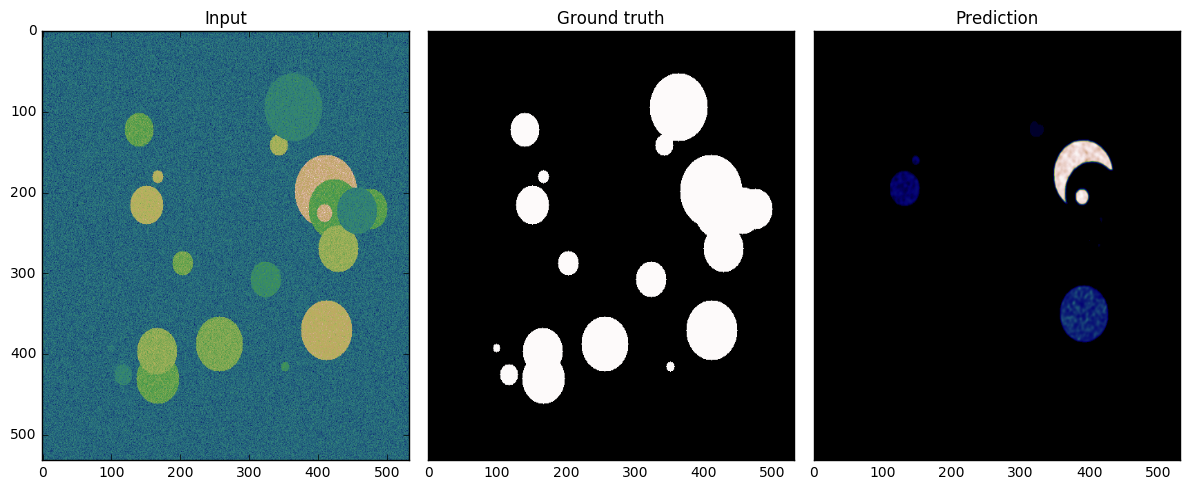

In [13]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] 
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("./docs/toy_problem.png")

In [12]:
!pwd

/mnt/unet/tf_unet


In [72]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=64)
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)

2017-07-19 21:06:45,196 Layers 3, features 64, filter size 3x3, pool size: 2x2
2017-07-19 21:06:46,474 Removing '/mnt/unet/tf_unet/prediction'
2017-07-19 21:06:46,476 Removing '/mnt/unet/tf_unet/unet_trained'
2017-07-19 21:06:46,479 Allocating '/mnt/unet/tf_unet/prediction'
2017-07-19 21:06:46,480 Allocating '/mnt/unet/tf_unet/unet_trained'
2017-07-19 21:06:48,922 Verification error= 15.8%, loss= 0.6866
2017-07-19 21:06:49,516 Start optimization
2017-07-19 21:06:52,079 Iter 0, Minibatch Loss= 0.5925, Training Accuracy= 0.7854, Minibatch error= 21.5%
2017-07-19 21:06:55,823 Iter 2, Minibatch Loss= 0.4852, Training Accuracy= 0.8174, Minibatch error= 18.3%
2017-07-19 21:06:59,467 Iter 4, Minibatch Loss= 0.4760, Training Accuracy= 0.8152, Minibatch error= 18.5%
2017-07-19 21:07:03,181 Iter 6, Minibatch Loss= 0.4283, Training Accuracy= 0.8408, Minibatch error= 15.9%
2017-07-19 21:07:06,858 Iter 8, Minibatch Loss= 0.5011, Training Accuracy= 0.7834, Minibatch error= 21.7%
2017-07-19 21:07:10,

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-07-19 21:13:26,513 Restoring parameters from ./unet_trained/model.cpkt
2017-07-19 21:13:26,696 Model restored from file: ./unet_trained/model.cpkt


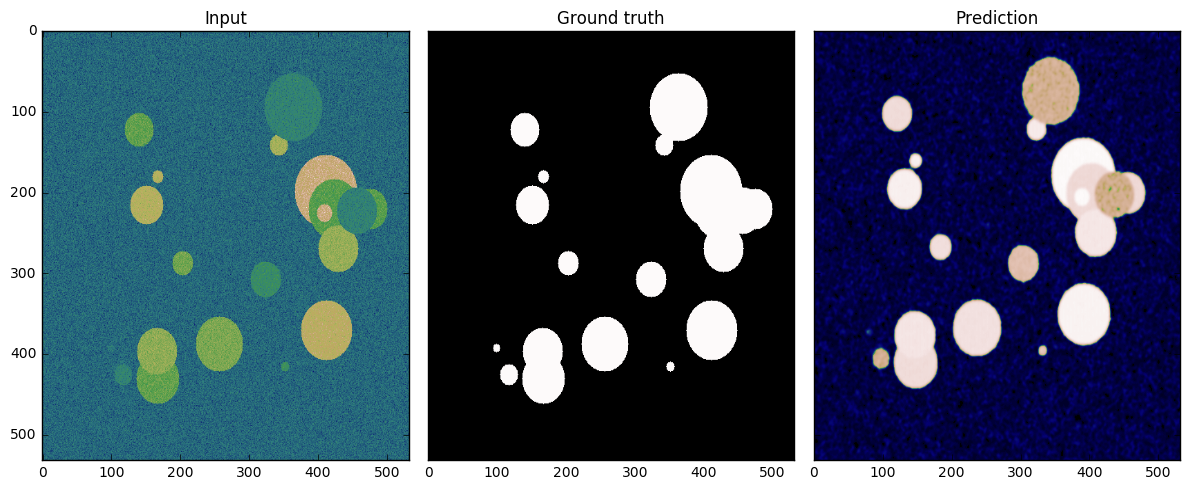

In [73]:
prediction = net.predict("./unet_trained/model.cpkt", x_test)

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] 
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("./docs/toy_problem.png")

In [21]:
print (y_test[0,200,...,1])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [24]:
print (x_test.shape)
print (y_test.shape)
print (prediction.shape)

(1, 572, 572, 1)
(1, 572, 572, 2)
(1, 532, 532, 2)


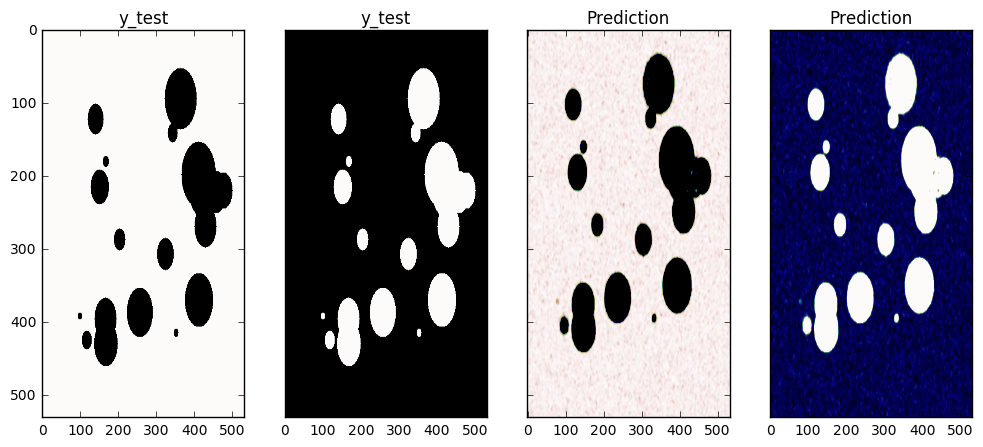

In [32]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(y_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
ax[2].imshow(prediction[0,...,0], aspect="auto")
ax[3].imshow(prediction[0,...,1], aspect="auto")
ax[0].set_title("y_test")
ax[1].set_title("y_test")
ax[2].set_title("Prediction")
ax[3].set_title("Prediction")

In [28]:
import scipy.misc 
scipy.misc.imsave('outfile.tiff', y_test[0,...,1])

In [29]:
! ls

AUTHORS.rst	  docs	       MANIFEST.in   requirements.txt  tf_unet
batch		  HISTORY.rst  outfile.tiff  scripts	       unet.ipynb
CONTRIBUTING.rst  LICENSE      prediction    setup.py	       unet_trained
demo		  Makefile     README.rst    test


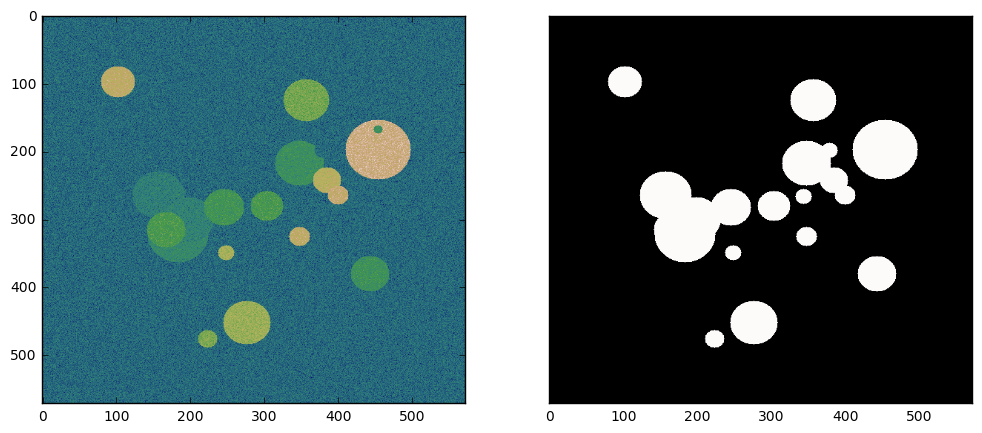

In [34]:
x_test1, y_test1 = generator(1)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test1[0,...,0], aspect="auto")
ax[1].imshow(y_test1[0,...,1], aspect="auto")

In [57]:
! rm -r testimage
! mkdir testimage
for i in range(20):
    x_test1, y_test1 = generator(1)
    scipy.misc.imsave('testimage/circle'+ str(i) +'.tif', x_test1[0,...,0])
    scipy.misc.imsave('testimage/circle'+ str(i) +'_mask.tif', y_test1[0,...,1])
! ls testimage

circle0_mask.tif   circle14_mask.tif  circle19_mask.tif  circle5_mask.tif
circle0.tif	   circle14.tif       circle19.tif	 circle5.tif
circle10_mask.tif  circle15_mask.tif  circle1_mask.tif	 circle6_mask.tif
circle10.tif	   circle15.tif       circle1.tif	 circle6.tif
circle11_mask.tif  circle16_mask.tif  circle2_mask.tif	 circle7_mask.tif
circle11.tif	   circle16.tif       circle2.tif	 circle7.tif
circle12_mask.tif  circle17_mask.tif  circle3_mask.tif	 circle8_mask.tif
circle12.tif	   circle17.tif       circle3.tif	 circle8.tif
circle13_mask.tif  circle18_mask.tif  circle4_mask.tif	 circle9_mask.tif
circle13.tif	   circle18.tif       circle4.tif	 circle9.tif


In [58]:
"""prepare image
http://tf-unet.readthedocs.io/en/latest/usage.html"""
from tf_unet import unet, util, image_util
data_provider = image_util.ImageDataProvider("testimage/*.tif")

Number of files used: 20


In [61]:
"""test training data"""
print (path)

./unet_trained/model.cpkt


In [75]:
net1 = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)
trainer1 = unet.Trainer(net1, optimizer="momentum", opt_kwargs=dict(momentum=0.2))
path1 = trainer1.train(data_provider, "./unet_trained1", training_iters=20, epochs=10, display_step=2)

2017-07-19 21:17:07,594 Layers 3, features 16, filter size 3x3, pool size: 2x2
2017-07-19 21:17:09,122 Removing '/mnt/unet/tf_unet/prediction'
2017-07-19 21:17:09,125 Removing '/mnt/unet/tf_unet/unet_trained1'
2017-07-19 21:17:09,126 Allocating '/mnt/unet/tf_unet/prediction'
2017-07-19 21:17:09,127 Allocating '/mnt/unet/tf_unet/unet_trained1'
2017-07-19 21:17:09,795 Verification error= 81.6%, loss= 0.7154
2017-07-19 21:17:10,412 Start optimization
2017-07-19 21:17:11,168 Iter 0, Minibatch Loss= 0.6482, Training Accuracy= 0.8060, Minibatch error= 19.4%
2017-07-19 21:17:11,987 Iter 2, Minibatch Loss= 0.5118, Training Accuracy= 0.8892, Minibatch error= 11.1%
2017-07-19 21:17:12,788 Iter 4, Minibatch Loss= 0.5244, Training Accuracy= 0.8069, Minibatch error= 19.3%
2017-07-19 21:17:13,603 Iter 6, Minibatch Loss= 0.5154, Training Accuracy= 0.8054, Minibatch error= 19.5%
2017-07-19 21:17:14,423 Iter 8, Minibatch Loss= 0.4906, Training Accuracy= 0.8145, Minibatch error= 18.5%
2017-07-19 21:17:1

INFO:tensorflow:Restoring parameters from ./unet_trained1/model.cpkt


2017-07-19 21:18:50,181 Restoring parameters from ./unet_trained1/model.cpkt
2017-07-19 21:18:50,361 Model restored from file: ./unet_trained1/model.cpkt


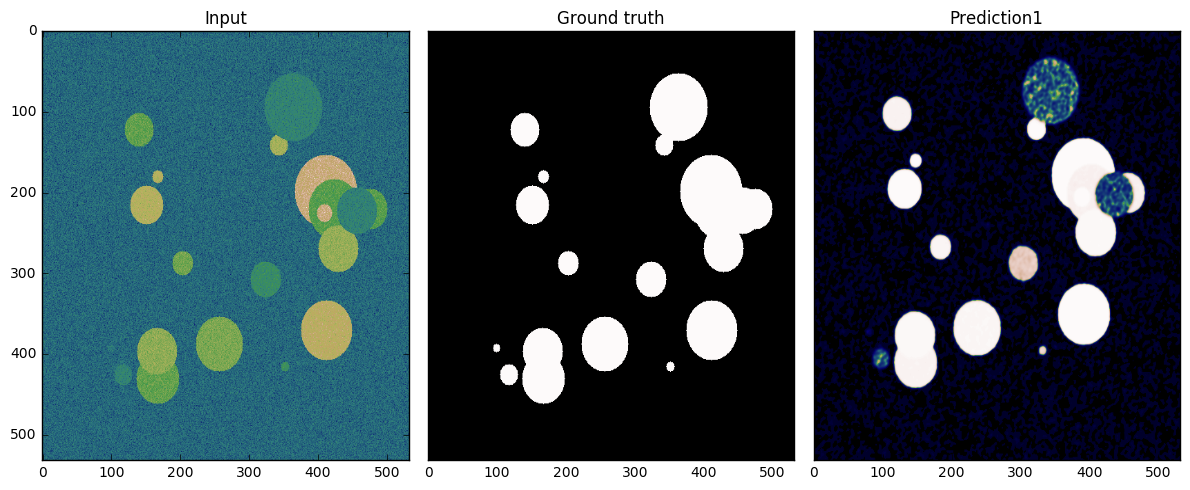

In [76]:
prediction1 = net1.predict("./unet_trained1/model.cpkt", x_test)

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction1[0,...,1] 
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction1")
fig.tight_layout()
# fig.savefig("./docs/toy_problem.png")